In [472]:
# Imports

import pickle
import numpy as np
import xlsxwriter as xl
import nltk
from nltk import pos_tag
from nltk import word_tokenize
import scipy.io as sio
import itertools
from itertools import chain
import string
import pandas as pd
import xlrd
from collections import Counter
from nltk.stem import WordNetLemmatizer
lemmas=WordNetLemmatizer()

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

### MATLAB files needed for this script

In [2]:
# keyPassageCategory.m
# labelSentences
# labelsPassageCategory
# labelsPassageForEachSentence
# labelsPassages
# labelsSentences

### Importing the sentences

In [2]:
f1g = [] #file 1 good
numSentences = 384
with open('stimuli_384sentences.txt', 'r') as file:
    for j in range(numSentences):
        line = file.readline().strip('\n')
        line = line.split(' ') # Every word as a string

        f1g.append(line)
            
#print("File 1 good list:")  
#print(f1g)

### Count number of words

In [3]:
with open('stimuli_384sentences.txt', 'r') as file1:
    f1 = file1.readlines()
    
f1e = []
f1e2 = []
for sentence in f1:
    sentence = sentence.split(' ')
    f1e.append(sentence)
    for word in sentence:
        word = word.replace('\n','')
        f1e2.append(word)
        
print(f1e[0:4])
print(f1e2[0:4])
print(len(f1e2)) # Contains number of words

[['An', 'accordion', 'is', 'a', 'portable', 'musical', 'instrument', 'with', 'two', 'keyboards.\n'], ['One', 'keyboard', 'is', 'used', 'for', 'individual', 'notes,', 'the', 'other', 'for', 'chords.\n'], ['Accordions', 'produce', 'sound', 'with', 'bellows', 'that', 'blow', 'air', 'through', 'reeds.\n'], ['An', 'accordionist', 'plays', 'both', 'keyboards', 'while', 'opening', 'and', 'closing', 'the', 'bellows.\n']]
['An', 'accordion', 'is', 'a']
4537


In [4]:
avgWordSent = len(f1e2)/numSentences
print(avgWordSent)

11.815104166666666


### POS tagging 

In [4]:
taglst = []
for sentence in f1g:
    tag = pos_tag(sentence)
    taglst.append(tag)

#print(taglst[0:2])
#print(taglst[0][0])

In [5]:
print('Taglist:')
print(taglst[0])

Taglist:
[('An', 'DT'), ('accordion', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('portable', 'JJ'), ('musical', 'JJ'), ('instrument', 'NN'), ('with', 'IN'), ('two', 'CD'), ('keyboards.', 'NNS')]


### Set list

In [122]:
setlst = [2]*4537

### Sentence number list

In [471]:
labelsSentences = sio.loadmat('labelsSentences_set2')

lS = labelsSentences['labelsSentences'] #Extracting the values

# Make list of sentence number and passage number

# For first sentence, add 1. Second sentence, add 2 for each word

print(f1g[0:3]) #append it here

snlst = [] #sentence number list
ncounter = 1
for sentence in f1g:
    for word in sentence:
        snlst.append(ncounter)

        for char in word:
            if char != '.':
                pass
            elif char == '.':
                ncounter += 1
                

[['An', 'accordion', 'is', 'a', 'portable', 'musical', 'instrument', 'with', 'two', 'keyboards.'], ['One', 'keyboard', 'is', 'used', 'for', 'individual', 'notes,', 'the', 'other', 'for', 'chords.'], ['Accordions', 'produce', 'sound', 'with', 'bellows', 'that', 'blow', 'air', 'through', 'reeds.']]


In [8]:
print(len(snlst))

4537


### Labels passages

In [9]:
labelsPassages = sio.loadmat('labelsPassageForEachSentence_set2')

lP = labelsPassages['labelsPassageForEachSentence']
lP = np.hsplit(lP,1)

lplst_old = np.array(lP).tolist()
lplst_old = lplst_old[0] #List of lists. I want the num values

print(lplst_old)

lplst = list(range(1,97))
lplst = list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in lplst))

print(len(lplst))

[[1], [1], [1], [1], [2], [2], [2], [2], [3], [3], [3], [3], [4], [4], [4], [4], [5], [5], [5], [5], [6], [6], [6], [6], [7], [7], [7], [7], [8], [8], [8], [8], [9], [9], [9], [9], [10], [10], [10], [10], [11], [11], [11], [11], [12], [12], [12], [12], [13], [13], [13], [13], [14], [14], [14], [14], [15], [15], [15], [15], [16], [16], [16], [16], [17], [17], [17], [17], [18], [18], [18], [18], [19], [19], [19], [19], [20], [20], [20], [20], [21], [21], [21], [21], [22], [22], [22], [22], [23], [23], [23], [23], [24], [24], [24], [24], [25], [25], [25], [25], [26], [26], [26], [26], [27], [27], [27], [27], [28], [28], [28], [28], [29], [29], [29], [29], [30], [30], [30], [30], [31], [31], [31], [31], [32], [32], [32], [32], [33], [33], [33], [33], [34], [34], [34], [34], [35], [35], [35], [35], [36], [36], [36], [36], [37], [37], [37], [37], [38], [38], [38], [38], [39], [39], [39], [39], [40], [40], [40], [40], [41], [41], [41], [41], [42], [42], [42], [42], [43], [43], [43], [43], [44

In [10]:
# Adding the passage number to words, and not sentences

lplst_word = []
counter = 0
for sentence in f1g:
    if counter == numSentences + 2:
        break
    for word in sentence:
        lplst_word.append(lplst[counter])
    counter += 1
    
print(lplst_word[0:43])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


### Sentence no. within passage

In [11]:
# Creating a tuple of the word list and the lplst_word (labels passages) list)

wordlst = []
for sentence in f1g:
    for word in sentence:
        wordlst.append(word)

print(len(wordlst)) #same length
print(len(lplst_word))

word_lp_tup = list(zip(wordlst,lplst_word))
print(word_lp_tup[0:45])

seen = set()

counter = 1
snplst = [] #sentence number within passage list
for tup in word_lp_tup:
    first = tup[0] #first index of the tuple, i.e. the word
    second = tup[1]

    if second not in seen:
        counter = 1 #restarting the counter if the passage number changes
        
    seen.add(second)
    snplst.append(counter)

    for char in first:
        if char != '.':
            continue
        if char == '.':
            counter += 1


4537
4537
[('An', 1), ('accordion', 1), ('is', 1), ('a', 1), ('portable', 1), ('musical', 1), ('instrument', 1), ('with', 1), ('two', 1), ('keyboards.', 1), ('One', 1), ('keyboard', 1), ('is', 1), ('used', 1), ('for', 1), ('individual', 1), ('notes,', 1), ('the', 1), ('other', 1), ('for', 1), ('chords.', 1), ('Accordions', 1), ('produce', 1), ('sound', 1), ('with', 1), ('bellows', 1), ('that', 1), ('blow', 1), ('air', 1), ('through', 1), ('reeds.', 1), ('An', 1), ('accordionist', 1), ('plays', 1), ('both', 1), ('keyboards', 1), ('while', 1), ('opening', 1), ('and', 1), ('closing', 1), ('the', 1), ('bellows.', 1), ('An', 2), ('apartment', 2), ('is', 2)]


### Word number within sentence

In [126]:
counter_no = 1
wnslst = [] # word number sentence list
for word in wordlst:
    
    wnslst.append(counter_no)
    counter_no += 1
    for char in word:
        if char != '.':
            continue
        if char == '.':
            counter_no = 1

print(wnslst[0:50])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8]


### Broad topic for each sentence

In [13]:
keyPassageCategory = ['animal','appliance','bird','body_part','building_part','clothing','crime','disaster','drink_non_alcoholic','dwelling','fish','fruit','furniture','human','insect','kitchen_utensil','landscape','music','place','profession','tool','vegetable','vehicles_transport','weapon']

countlst = list(range(1,95))

# Making a tuple of categories and numbering

pascat = list(zip(countlst,keyPassageCategory))

print(pascat)

[(1, 'animal'), (2, 'appliance'), (3, 'bird'), (4, 'body_part'), (5, 'building_part'), (6, 'clothing'), (7, 'crime'), (8, 'disaster'), (9, 'drink_non_alcoholic'), (10, 'dwelling'), (11, 'fish'), (12, 'fruit'), (13, 'furniture'), (14, 'human'), (15, 'insect'), (16, 'kitchen_utensil'), (17, 'landscape'), (18, 'music'), (19, 'place'), (20, 'profession'), (21, 'tool'), (22, 'vegetable'), (23, 'vehicles_transport'), (24, 'weapon')]


In [14]:
labelsPassageCategory = sio.loadmat('labelsPassageCategory_set2')

lPC = labelsPassageCategory['labelsPassageCategory']
lPC = np.hsplit(lPC,1)

lpclst = np.array(lPC).tolist()
lpclst = lpclst[0]

lpclst = list(chain.from_iterable(lpclst)) # Accessing the nested lists
print(lpclst)


[18, 10, 12, 7, 23, 24, 12, 13, 15, 23, 20, 2, 14, 22, 15, 20, 1, 13, 18, 11, 9, 17, 13, 5, 6, 7, 8, 3, 8, 1, 4, 19, 4, 8, 5, 4, 17, 16, 16, 14, 6, 21, 24, 1, 19, 10, 10, 16, 22, 22, 19, 10, 14, 9, 15, 17, 4, 16, 7, 9, 3, 12, 18, 11, 12, 3, 2, 24, 11, 21, 20, 21, 21, 11, 23, 6, 20, 24, 15, 17, 6, 13, 2, 7, 2, 22, 23, 19, 8, 18, 3, 5, 9, 1, 5, 14]


In [136]:
lpclst_word = []

for value in lplst_word: #Iterating through the passage number list
    lpclst_word.append(lpclst[value-1]) #Appending values from the lpclst, which contains category labels
    
# Need to match the category label list: lpclst with the actual category names, keyPassageCategory

catlst = []

for value in lpclst_word:
    for tup in pascat:
        first = tup[0]
        second = tup[1]
        
        if value == first:
            catlst.append(second)

#print(catlst)

### ONLY SET 2 - specific category

In [78]:
specCat = sio.loadmat('keyPassages_set2')

In [129]:
sC = specCat['keyPassages']
sC2 = np.split(sC,[1],axis=1)
clean = sC2[0]

specCat1 = []
for name in clean:
    cleanword = name[0][0]
    specCat1.append(cleanword)

print(specCat1)

['Accordion', 'Apartment', 'Apple', 'Arson', 'Automobile', 'Axe', 'Banana', 'Bed', 'Bee', 'Bicycle', 'Blacksmith', 'Blender', 'Boy', 'Broccoli', 'Butterfly', 'Carpenter', 'Cat', 'Chair', 'Clarinet', 'Cod', 'Coffee', 'Desert', 'Desk', 'Door', 'Dress', 'Driving_under_the_influence', 'Drought', 'Eagle', 'Earthquake', 'Elephant', 'Eye', 'Farm', 'Finger', 'Flood', 'Floor', 'Foot', 'Forest', 'Fork', 'Frying_pan', 'Girl', 'Glove', 'Hammer', 'Hand_grenade', 'Horse', 'Hospital', 'House', 'Igloo', 'Knife', 'Lentil', 'Lettuce', 'Library', 'Log_cabin', 'Man', 'Milk', 'Mosquito', 'Mountain', 'Mouth', 'Mug', 'Murder', 'Orange_juice', 'Parrot', 'Peach', 'Piano', 'Piranha', 'Raspberry', 'Raven', 'Refrigerator', 'Rifle', 'Salmon', 'Saw', 'Scientist', 'Scissors', 'Screwdriver', 'Shark', 'Ship', 'Shoe', 'Soldier', 'Spear', 'Spider', 'Swamp', 'Sweater', 'Table_(furniture)', 'Television', 'Theft', 'Toaster', 'Tomato', 'Train', 'Train_station', 'Tropical_cyclone', 'Violin', 'Vulture', 'Wall', 'Water', 'Whal

In [132]:
specCatLst = list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in specCat1))
print(specCatLst[0:40])

['Accordion', 'Accordion', 'Accordion', 'Accordion', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apple', 'Apple', 'Apple', 'Apple', 'Arson', 'Arson', 'Arson', 'Arson', 'Automobile', 'Automobile', 'Automobile', 'Automobile', 'Axe', 'Axe', 'Axe', 'Axe', 'Banana', 'Banana', 'Banana', 'Banana', 'Bed', 'Bed', 'Bed', 'Bed', 'Bee', 'Bee', 'Bee', 'Bee', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle']


In [150]:
pasCount = list(range(1,97))


In [152]:
specCatDict = list(zip(specCat1, pasCount))

In [153]:
print(specCatDict)

[('Accordion', 1), ('Apartment', 2), ('Apple', 3), ('Arson', 4), ('Automobile', 5), ('Axe', 6), ('Banana', 7), ('Bed', 8), ('Bee', 9), ('Bicycle', 10), ('Blacksmith', 11), ('Blender', 12), ('Boy', 13), ('Broccoli', 14), ('Butterfly', 15), ('Carpenter', 16), ('Cat', 17), ('Chair', 18), ('Clarinet', 19), ('Cod', 20), ('Coffee', 21), ('Desert', 22), ('Desk', 23), ('Door', 24), ('Dress', 25), ('Driving_under_the_influence', 26), ('Drought', 27), ('Eagle', 28), ('Earthquake', 29), ('Elephant', 30), ('Eye', 31), ('Farm', 32), ('Finger', 33), ('Flood', 34), ('Floor', 35), ('Foot', 36), ('Forest', 37), ('Fork', 38), ('Frying_pan', 39), ('Girl', 40), ('Glove', 41), ('Hammer', 42), ('Hand_grenade', 43), ('Horse', 44), ('Hospital', 45), ('House', 46), ('Igloo', 47), ('Knife', 48), ('Lentil', 49), ('Lettuce', 50), ('Library', 51), ('Log_cabin', 52), ('Man', 53), ('Milk', 54), ('Mosquito', 55), ('Mountain', 56), ('Mouth', 57), ('Mug', 58), ('Murder', 59), ('Orange_juice', 60), ('Parrot', 61), ('Pea

In [157]:
specCatLst2 = []

for value in lplst_word:
    for tup in specCatDict:
        first = tup[0]
        second = tup[1]
        
        if value == second:
            specCatLst2.append(first)

print(specCatLst2[0:50])

['Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Accordion', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment']


### Word length

In [16]:
# Finding all characters (letters, numbers and punctuation) in the corpus

# Creating a character list

charlst = []
for word in wordlst:
    for char in word:
        charlst.append(char)

uniquechar = set(charlst)
print(uniquechar)

nonletters = ['-','.',"'",'7',',','8','4',':','0','$','1','9']


{'u', 'k', 'B', 'a', '%', ',', 'v', 'q', 'g', 'w', 'c', 'O', 'h', 'A', 'E', 'F', 'e', 'b', 'K', 'x', 'V', '.', 'i', 'T', 'n', 'j', 'o', 'C', 'G', 'N', 'R', 'M', 'l', 'm', 'P', 's', '0', 'L', 'y', 't', 'p', 'd', 'D', '-', 'H', 'W', 'f', 'z', '7', "'", 'r', 'S', 'U', 'I'}


### Stripping punctuation and capitalized letters

In [17]:
# Stripping wordlist for punctuation

wordlst_np = wordlst # wordlist no punctuation

wordlst_np = ["".join( j for j in i if j not in string.punctuation) for i in wordlst_np]     

#print(wordlst_np[50:900]) #Stripped list!

charcount = 0
wordlen = []
for word in wordlst_np:
    for char in word:
        charcount += 1
    wordlen.append(charcount)
    charcount = 0

print(len(wordlen))

4537


In [18]:
# Removing capitalized letters
wordlst_l = [] #wordlist lowercase
for word in wordlst_np:
    lower_word = word.lower()
    wordlst_l.append(lower_word)

#print(wordlst_l[90:130])

In [323]:
# Removing capitalized letters from original list, thus with punctuation
wordlst_lower = [] #wordlist lowercase
for word in wordlst:
    lower_word = word.lower()
    wordlst_lower.append(lower_word)

### Making lemmatized list

In [19]:
# Checking all the different POS tags in taglst

unique_tags = []
for sent in taglst:
    for tup in sent:
        second = tup[1]
        unique_tags.append(second)

#print(unique_tags)
unique_tags = set(unique_tags)
print(unique_tags)
print(sorted(unique_tags))

{'JJR', 'VBP', 'PRP', 'NNS', 'DT', 'MD', 'EX', 'VBD', 'RP', 'NNP', 'VB', 'WDT', 'PRP$', 'IN', 'VBN', 'CC', 'VBZ', 'RB', 'CD', 'WP', 'TO', 'JJS', 'JJ', 'VBG', 'WRB', 'PDT', 'NN', 'RBS'}
['CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'PRP', 'PRP$', 'RB', 'RBS', 'RP', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB']


In [20]:
# Out of the tags, I say the following are nouns:
# NNS, NN, NNP, 
# Verbs:
# VBP, VBG, VBD, VBN, VBZ, VB

### Create list with the POS tags and choose which ones are nouns/verbs

In [21]:
# Create a list with only POS tags and zip it together with the wordlst_l
POS_tags=[]
# Make tags lowercase
for entry in taglst:
    for tup in entry:
        tag=tup[1]
        #tag = tag.lower()
        POS_tags.append(tag)

# make all noun tags to 'n' and all verb tags to 'v' for the lemmatizer to work
POS_nouns=['NN','NNS','NNP']
POS_verbs=['VBD','VBG','VBN','VBP','VBZ'] #did not add VB=verb base form
POS_tags_s=[] #POS tags short


### Lemmatize nouns + verbs

In [22]:
# for nouns
for tag in POS_tags:
    tagfound_N=[i for i, j in enumerate(POS_nouns) if j == tag]
#    tagfound_V=[k for k, g in enumerate(POS_verbs) if g == tag]

    if len(tagfound_N)>0:
        POS_tags_s.append('n')        
    if len(tagfound_N) == 0:
        POS_tags_s.append(tag)

# for verbs
POS_tags2=[]
for tag in POS_tags_s:
    tagfound_V=[k for k, g in enumerate(POS_verbs) if g == tag]
    if len(tagfound_V)>0:
        POS_tags2.append('v')        
    if len(tagfound_V) == 0:
        POS_tags2.append(tag)
        
#print(POS_tags2)

taglst_l = list(zip(wordlst_l,POS_tags2))       
print(taglst_l[0:20])
    

[('an', 'DT'), ('accordion', 'n'), ('is', 'v'), ('a', 'DT'), ('portable', 'JJ'), ('musical', 'JJ'), ('instrument', 'n'), ('with', 'IN'), ('two', 'CD'), ('keyboards', 'n'), ('one', 'CD'), ('keyboard', 'n'), ('is', 'v'), ('used', 'v'), ('for', 'IN'), ('individual', 'JJ'), ('notes', 'PDT'), ('the', 'DT'), ('other', 'JJ'), ('for', 'IN')]


In [23]:
# Converts all nouns and verbs to lemmatized versions
wordlst_lem=[] #name of the list with lemma words! 

for counter,tag in enumerate(taglst_l):
    if tag[1] == 'n':
        lem=lemmas.lemmatize(tag[0],'n')
        wordlst_lem.append(lem)
    if tag[1] == 'v':
        lem=lemmas.lemmatize(tag[0],'v')
        wordlst_lem.append(lem)
    if tag[1] != 'n' and tag[1]!='v':
        wordlst_lem.append(tag[0])

print(wordlst_lem[200:240])
print(taglst_l[200:240])


['or', 'electric', 'engine', 'the', 'driver', 'steer', 'the', 'car', 'on', 'road', 'other', 'passenger', 'just', 'sit', 'automobile', 'vary', 'in', 'size', 'number', 'of', 'door', 'and', 'the', 'type', 'of', 'trunk', 'the', 'axe', 'be', 'a', 'tool', 'use', 'to', 'split', 'and', 'cut', 'wood', 'the', 'axe', 'usually']
[('or', 'CC'), ('electric', 'JJ'), ('engine', 'n'), ('the', 'DT'), ('driver', 'n'), ('steers', 'v'), ('the', 'DT'), ('car', 'n'), ('on', 'IN'), ('roads', 'n'), ('other', 'JJ'), ('passengers', 'n'), ('just', 'RB'), ('sit', 'VB'), ('automobiles', 'n'), ('vary', 'v'), ('in', 'IN'), ('size', 'JJ'), ('number', 'n'), ('of', 'IN'), ('doors', 'n'), ('and', 'CC'), ('the', 'DT'), ('type', 'n'), ('of', 'IN'), ('trunk', 'n'), ('the', 'DT'), ('axe', 'n'), ('is', 'v'), ('a', 'DT'), ('tool', 'n'), ('used', 'v'), ('to', 'TO'), ('split', 'VB'), ('and', 'CC'), ('cut', 'VB'), ('wood', 'n'), ('the', 'DT'), ('axe', 'n'), ('usually', 'RB')]


In [24]:
# compare entries in lem list and non-lem list

diff_lem=[i for i, j in zip(wordlst_l, wordlst_lem) if i != j]

print(len(diff_lem)) #i.e. number of the same entries is 3464. Entries that were edited: 4537-3464=1073
print(len(wordlst_lem))
print(len(wordlst_l))

1073
4537
4537


In [477]:
4537-1073

1073*100/4537


23.649988979501874

### Lemmatize only nouns

In [25]:
taglst_nouns = list(zip(wordlst_l,POS_tags_s))       
print(taglst_nouns[0:20])

[('an', 'DT'), ('accordion', 'n'), ('is', 'VBZ'), ('a', 'DT'), ('portable', 'JJ'), ('musical', 'JJ'), ('instrument', 'n'), ('with', 'IN'), ('two', 'CD'), ('keyboards', 'n'), ('one', 'CD'), ('keyboard', 'n'), ('is', 'VBZ'), ('used', 'VBN'), ('for', 'IN'), ('individual', 'JJ'), ('notes', 'PDT'), ('the', 'DT'), ('other', 'JJ'), ('for', 'IN')]


In [26]:
# Converts all nouns to lemmatized versions
wordlst_lem_n=[]
for counter,tag in enumerate(taglst_nouns):
    if tag[1] == 'n':
        lem=lemmas.lemmatize(tag[0],'n')
        wordlst_lem_n.append(lem)
    if tag[1] != 'n':
        wordlst_lem_n.append(tag[0])

print(wordlst_l[240:280])
print(wordlst_lem_n[240:280])


['consists', 'of', 'a', 'head', 'attached', 'to', 'a', 'handle', 'historically', 'axe', 'heads', 'were', 'made', 'of', 'stone', 'and', 'then', 'metal', 'axes', 'are', 'used', 'by', 'woodcutters', 'and', 'firemen', 'entering', 'buildings', 'a', 'banana', 'is', 'a', 'long', 'fruit', 'that', 'grows', 'in', 'bunchs', 'with', 'a', 'soft']
['consists', 'of', 'a', 'head', 'attached', 'to', 'a', 'handle', 'historically', 'axe', 'head', 'were', 'made', 'of', 'stone', 'and', 'then', 'metal', 'ax', 'are', 'used', 'by', 'woodcutter', 'and', 'fireman', 'entering', 'building', 'a', 'banana', 'is', 'a', 'long', 'fruit', 'that', 'grows', 'in', 'bunch', 'with', 'a', 'soft']


In [27]:
# compare entries in lem list and non-lem list

diff_lem_n=[i for i, j in zip(wordlst_l, wordlst_lem_n) if i != j]

print(len(diff_lem_n)) #i.e. Entries that were edited: 508
print(len(wordlst_lem_n))
print(len(wordlst_l))

508
4537
4537


###  NA count function

In [246]:
# Function for counting NA values in tuple

def countTupNA(tuplelist):
    '''Count the number of NA values in a tuple consisting of word and value'''
    NAcounter = 0
    for tup in tuplelist:
        second = tup[1]
        if second.count('#NA') == 1:
            NAcounter +=1
    
    return NAcounter

In [197]:
# Function for counting NA values in list

def countNA(lst):
    '''Count the number of NA values in a tuple consisting of word and value'''
    NAcounter = 0
    for value in lst:
        if value.count('#NA') == 1:
            NAcounter +=1
    
    return NAcounter

### Feature function: AoA, valence, arousal, prevalence, lexical frequency, concreteness, possible POS tags, ambiguity

In [161]:
def getFeature(wordlist,feature):
    '''Function for acquiring AoA values. 
    
    Input: 1) list of words. 2) feature: AoA, valence, arousal, prevalence,
    lexical frequency, concreteness, possible POS tags, ambiguity

    Return: 1) list of solely feature values
            2) tuple corresponding of the word and feature value'''
    firstVal = []
    secondVal = []
    
    # AoA EXCEL FILE #
    if feature == 'aoa':
        excelFile = pd.read_excel('AoA.xlsx')
        formatExcel = ['Word', 'Rating.Mean']
        wordVal = excelFile[formatExcel]

        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Rating.Mean']
            secondVal.append(second)
    
    # Valence EXCEL FILE #
    if feature == 'valence':
        excelFile = pd.read_excel('valence.xlsx')
        formatExcel = ['Word', 'V.Mean.Sum']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['V.Mean.Sum']
            secondVal.append(second)
    
    # Arousal EXCEL FILE #
    if feature == 'arousal':
        excelFile = pd.read_excel('valence.xlsx')
        formatExcel = ['Word', 'A.Mean.Sum']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['A.Mean.Sum']
            secondVal.append(second)
            
    # Prevalence EXCEL FILE #
    if feature == 'prevalence':
        excelFile = pd.read_excel('prevalence.xlsx')
        formatExcel = ['Word', 'Prevalence']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Prevalence']
            secondVal.append(second)
            
    # Lexical frequency EXCEL FILE #
    if feature == 'frequency':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'Lexical_frequency']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Lexical_frequency']
            secondVal.append(second)
            
    # Concreteness EXCEL FILE #
    if feature == 'concreteness':
        excelFile = pd.read_excel('concreteness.xlsx')
        formatExcel = ['Word', 'Conc.M']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Conc.M']
            secondVal.append(second)
    
    # Possible EXCEL FILE (possible tags) #
    if feature == 'possible':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'All_PoS_SUBTLEX']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['All_PoS_SUBTLEX']
            secondVal.append(second)
            
    # Ambiguity EXCEL FILE #
    if feature == 'ambiguity':
        excelFile = pd.read_excel('wordmatch.xlsx')
        formatExcel = ['Word', 'Percentage_dom_PoS']
        wordVal = excelFile[formatExcel]
        
        for index, row in excelFile.iterrows(): #Iterating over rows, i.e. words
            first = row['Word']
            firstVal.append(first)
            second = row['Percentage_dom_PoS']
            secondVal.append(second)
    
    wordvals_feature = []
    wordlst_feature = []
    for word in wordlist:
        wordfound_feature=[i for i, j in enumerate(firstVal) if j == word]
        wordval_feature=[secondVal[i] for i, j in enumerate(firstVal) if j == word]

        if len(wordfound_feature) > 0:
            wordvals_feature.append(wordval_feature)
            wordlst_feature.append(word)

        if len(wordfound_feature) == 0:
            wordvals_feature.append(['#NA'])
            wordlst_feature.append(word)

    final_feature = list(zip(wordlst_feature,wordvals_feature))
    
    return wordvals_feature, final_feature


### Content / function

In [46]:
# Content: nouns, verbs, adjectives and adverbs. 1
# Function: the rest. 0


In [67]:
print(taglst[0])

[('An', 'DT'), ('accordion', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('portable', 'JJ'), ('musical', 'JJ'), ('instrument', 'NN'), ('with', 'IN'), ('two', 'CD'), ('keyboards.', 'NNS')]


In [53]:
# Check which different POS-tags I have

seenPOS=set()
first_cf = []
second_cf = []

for sentence in taglst:
    for tup in sentence:
        first = tup[0]
        first_cf.append(first)
    
        second = tup[1]
        seenPOS.add(second)
        second_cf.append(second)

content_lst = ['VB','NN','NNP','NNS','JJ','JJS','JJR','VBD','VBG','VBN','VBP','VBZ','RB','RBR','RBS','WRB']
print(sorted(seenPOS))
print(sorted(content_lst))


['CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'PRP', 'PRP$', 'RB', 'RBS', 'RP', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB']
['JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WRB']


In [54]:
binary_lst = []

for tag in second_cf:
    
    tagfound=[i for i, j in enumerate(content_lst) if j == tag]
    
    if len(tagfound) == 1:
        binary_lst.append(1)
    
    
    if len(tagfound) == 0:
        binary_lst.append(0)


In [55]:
print(len(binary_lst))

4537


In [56]:
# How many content vs function?

In [475]:
print(binary_lst.count(1))
print(2932*100/4537)

2932
64.62420101388582


In [476]:
print(binary_lst.count(0))
print(1605*100/4537)

1605
35.37579898611417


### Lexical surprisal - non lemmatized

In [69]:
# https://colala.bcs.rochester.edu/data/PiantadosiTilyGibson2011/Google10L-1T/
# the higher lexical surprisal rating, the more surprising? 

In [272]:
# for the different surprisal files, concatenate the lists

file1=open('surprisal-1.txt','r')
text1=file1.read()
#print(text)
file1.close()

textspl1=text1.split()

file2=open('surprisal-2.txt','r')
text2=file2.read()
#print(text)
file2.close()

textspl2=text2.split()

file3=open('surprisal-3.txt','r')
text3=file3.read()
file3.close()

textspl3=text3.split()

file4=open('surprisal-4.txt','r')
text4=file4.read()

textspl4=text4.split()
file4.close()

merged_lst = textspl1+textspl2+textspl3+textspl4

In [274]:
wordrabbit=['honey-making']
surpVals=[]

for w in wordlst_l:

    str1='"'+w+'"';
    
    #fw=[i for i, j in enumerate(textspl) if j=='"'+w+'"']
    try:
        fw=merged_lst.index(str1)
    except:
        surpVals.append('[#NA]')
        continue

    #print(fw)

    surp_val=merged_lst[fw+3]
    #print(surp_val)

    surpVals.append(surp_val)


In [276]:
print(surpVals[0:20])

['8.617', '18.898', '6.985', '6.037', '14.089', '13.660', '14.863', '7.549', '10.399', '16.232', '9.229', '14.801', '6.985', '10.466', '6.651', '12.618', '12.864', '4.687', '9.251', '6.651']


In [281]:
# Testing number of NA

counter = 0
for value in surpVals:
    if value.count('#NA') ==1:
        counter +=1

print(counter)

10


In [ ]:
# Find unique NA surprisal values

In [371]:
surpTup = list(zip(wordlst_l,surpVals))


In [372]:
print(len(surpTup))

print(countNA(surpVals))

4537
10


In [373]:
NA_wordlst_sur=[]

for tup in surpTup:
    #print(tup[1])
    if tup[1]=='[#NA]':
        NA_wordlst_sur.append(tup[0])

u_sur=np.unique(NA_wordlst_sur)
print(u_sur)
print(NA_wordlst_sur)

#print(NA_wordlst_sur) #Remember some of the unique words are numbers! 
#print(len(u_sur))

nonums_sur=[x for x in u_sur if not any(x1.isdigit() for x1 in x)]
print(len(nonums_sur))

['70' 'brightlycolored' 'felttipped' 'illomen' 'mildtasting'
 'orangeyellow' 'seventhlargest' 'teflonclad' 'twobladed' 'vehiclerelated']
['mildtasting', 'seventhlargest', 'vehiclerelated', 'teflonclad', 'brightlycolored', 'orangeyellow', 'felttipped', 'illomen', 'twobladed', '70']
9


### Lexical surprisal - lemmatized - not run

In [ ]:
surpVals_lem=[]

for w in wordlst_lem:
    str1='"'+w+'"';
    try:
        fw=merged_lst.index(str1)
    except:
        surpVals_lem.append('[#NA]')
        continue

    surp_val=merged_lst[fw+3]

    surpVals_lem.append(surp_val)


### Analyze lexical features 

In [262]:
aoaVals, aoaTup = getFeature(wordlst_l,'aoa')
aoaVals_lem, aoaTup_lem = getFeature(wordlst_lem,'aoa')

valVals, valTup = getFeature(wordlst_l,'valence')
valVals_lem, valTup_lem = getFeature(wordlst_lem,'valence')

arVals, arTup = getFeature(wordlst_l,'arousal')
arVals_lem, arTup_lem = getFeature(wordlst_lem,'arousal')

prevVals, prevTup = getFeature(wordlst_l,'prevalence')
prevVals_lem, prevTup_lem = getFeature(wordlst_lem,'prevalence')

freqVals, freqTup = getFeature(wordlst_l,'frequency')
freqVals_lem, freqTup_lem = getFeature(wordlst_lem,'frequency')

concVals, concTup = getFeature(wordlst_l,'concreteness')
concVals_lem, concTup_lem = getFeature(wordlst_lem,'concreteness')

possVals, possTup = getFeature(wordlst_l,'possible')
possVals_lem, possTup_lem = getFeature(wordlst_lem,'possible')

ambVals, ambTup = getFeature(wordlst_l,'ambiguity')
ambVals_lem, ambTup_lem = getFeature(wordlst_lem,'ambiguity')


In [250]:
# Create merged list (tested with concreteness)
mergeCount = 0
mergeLst = []
NAcounter = 0
for value in concVals:    
    if value != ['#NA']:
        mergeLst.append(value)
    
    if value == ['#NA']:
        lemVal = concVals_lem[mergeCount]
        mergeLst.append(lemVal)
        NAcounter += 1
        
    mergeCount += 1
 
# print(mergeLst[4500:])
# print(NAcounter)
# print(mergeCount)
# print(len(mergeLst))
# print(len(concVals_lem))


In [480]:
print(freqTup)

[('an', [4.97805263012357]), ('accordion', [1.83250891270624]), ('is', [5.662440491974]), ('a', [6.01752581716572]), ('portable', [2.31175386105575]), ('musical', [2.82736927305383]), ('instrument', [2.6170003411209]), ('with', [5.41071988585366]), ('two', [4.73547913286875]), ('keyboards', [1.36172783601759]), ('one', [5.19502742193737]), ('keyboard', [1.96848294855394]), ('is', [5.662440491974]), ('used', [4.24432661023064]), ('for', [5.54611185676681]), ('individual', [2.77597433112937]), ('notes', [3.09898963940118]), ('the', [6.1766436197553]), ('other', [4.57410074928645]), ('for', [5.54611185676681]), ('chords', [1.89209460269048]), ('accordions', [0.602059991327962]), ('produce', [2.75204844781944]), ('sound', [3.86415495600203]), ('with', [5.41071988585366]), ('bellows', [1.6232492903979]), ('that', [5.8571382268439]), ('blow', [3.69696764074402]), ('air', [3.85070748537454]), ('through', [4.44757661352292]), ('reeds', [1.23044892137827]), ('an', [4.97805263012357]), ('accordi

### Merge lists function

In [251]:
def mergeList(nonLemVals,lemVals):
    '''Input: Two lists.
       Return: If list 1 contains NA vals, the NA val is replaced by the value in list 2 (either numerical val or #NA again)
    '''

    mergeCount = 0
    mergeLst = []
    NAcounter = 0
    for value in nonLemVals:    
        if value != ['#NA']:
            mergeLst.append(value)

        if value == ['#NA']:
            lemVal = lemVals[mergeCount]
            mergeLst.append(lemVal)
            NAcounter += 1
        mergeCount += 1
        
    return mergeLst

In [203]:
conmerge, NAcount = mergeList(concVals,concVals_lem)

In [252]:
# There are two fewer NA values in the merged lists, than in the lemmatized lists. Due to words that were lemmatized, 
# and can't be found in the data base: specie (non lemmatized: species) and plier (pliers). Thus two NA vals less in merged list.

# print(conmerge)
# print(NAcount)
# print(countNA(conmerge))
# print(countNA(concVals_lem))
# print(countNA(mergeLst))

# print(concVals_lem[4500:])


# diff_NAs =[i for i, j in zip(mergeLst, concVals_lem) if i != j]
# #print(diff_NAs)


In [253]:
# Testing the difference in NA vals between merged list and lemmatized list
# enum = []
# for count, ii in enumerate(mergeLst):

#     if ii == ['#NA']:
#         enum.append(count)
        
# print(enum)

# print(' ')
# enum2 = []
# for count, ii in enumerate(concVals_lem):

#     if ii == ['#NA']:
#         enum2.append(count)

# print(enum2)

# diff_NA =[i for i, j in zip(enum, enum2) if i != j]
# print(diff_NA)

In [254]:
# print(mergeLst[1290:1310])
# print(concVals_lem[1290:1310])
# print(concTup_lem[1290:1310])
# print(concTup[1290:1310])

# print(countTupNA(concTup_lem))


In [255]:
armerge = mergeList(arVals,arVals_lem)

In [261]:
print(countNA(armerge))
print(countNA(arVals_lem)) #4 vals less NA in merged list

enum = []
for count, ii in enumerate(armerge):
    if ii == ['#NA']:
        enum.append(count)
        
#print(enum)

print(' ')
enum2 = []
for count, ii in enumerate(arVals_lem):
    if ii == ['#NA']:
        enum2.append(count)

#print(enum2)

diff_NA =[i for i, j in zip(enum, enum2) if i != j]
#print(diff_NA)

print(armerge[720:730])
print(arVals_lem[720:730])
print(arTup_lem[720:730])
print(arTup[720:730])



1897
1901
 
[[3.91], ['#NA'], ['#NA'], [4.56], [4.18], [3.55], ['#NA'], [4.91], ['#NA'], ['#NA']]
[[3.91], ['#NA'], ['#NA'], [4.56], [4.18], ['#NA'], ['#NA'], [4.91], ['#NA'], ['#NA']]
[('tool', [3.91]), ('such', ['#NA']), ('as', ['#NA']), ('hammer', [4.56]), ('saw', [4.18]), ('plier', ['#NA']), ('and', ['#NA']), ('plane', [4.91]), ('a', ['#NA']), ('luthier', ['#NA'])]
[('tools', ['#NA']), ('such', ['#NA']), ('as', ['#NA']), ('hammers', ['#NA']), ('saws', ['#NA']), ('pliers', [3.55]), ('and', ['#NA']), ('planes', ['#NA']), ('a', ['#NA']), ('luthier', ['#NA'])]


### Merge all non-lemmatized and lemmatized lists

In [294]:
aoaMerge = mergeList(aoaVals,aoaVals_lem)

valMerge = mergeList(valVals,valVals_lem)

arMerge = mergeList(arVals,arVals_lem)

prevMerge = mergeList(prevVals,prevVals_lem)

freqMerge = mergeList(freqVals,freqVals_lem)

concMerge = mergeList(concVals,concVals_lem)

possMerge = mergeList(possVals,possVals_lem)

ambMerge = mergeList(ambVals,ambVals_lem)

#surpMerge = mergeList(surpVals,surpVals_lem) # Did not run the lemmatized 


In [271]:
print(countNA(ambMerge))
print(countNA(ambVals_lem))



31
33


### Excel appending - function

In [69]:
alphabetNum = list(range(0,27))
letterCount = dict(zip(string.ascii_uppercase, alphabetNum))

def writeCol(colnumber,colheader,appendlist):
    # 'C1','Content/function'
    sheet1.write(colnumber,colheader)
    add_counter = 0  
    
    numInput = colnumber[:-1]
    numAppend = letterCount.get(numInput) # Which column to append to
    
    for number in appendlist:
        add_counter += 1
        sheet1.write(add_counter,numAppend,number)


In [300]:
alphabetNum = list(range(0,27))
letterCount = dict(zip(string.ascii_uppercase, alphabetNum))

def writeColList(colnumber,colheader,appendlist):
    '''For list-type items, i.e. if lists in lists'''
    sheet1.write(colnumber,colheader)
    add_counter = 0  
    
    numInput = colnumber[:-1]
    numAppend = letterCount.get(numInput) # Which column to append to
    
    for number in appendlist:
        newNum = number[0]
        add_counter += 1
        sheet1.write(add_counter,numAppend,newNum)


### Write to excel

In [306]:
wb = xl.Workbook('set2.xlsx')
sheet1 = wb.add_worksheet('sheet1')

# Appending tuple with POS and words
sheet1.write('A1','Word')
sheet1.write('B1','POS')
add_counter1 = 0
for sentence in taglst:
    for tupleentry in sentence:
        add_counter1 += 1
        sheet1.write_row(add_counter1,0,tupleentry)
        
# Appending lists  
writeCol('C1','Content/function',binary_lst)
writeCol('D1','Set no.',setlst)
writeCol('E1','Sentence no.',snlst)
writeCol('F1','Passage no.',lplst_word)
writeCol('G1','Sentence no. within passage',snplst)
writeCol('H1','Word no. within sentence',wnslst)
writeCol('I1','Broad topic',catlst)
writeCol('J1','Specific topic',specCatLst2)
writeCol('K1','Word length',wordlen)

# Order: 'aoa','conc','prev','ar','vale','amb','freq','sur' - in the excel, length comes first! 'len'
writeColList('L1','Age of acquisition',aoaMerge)
writeColList('M1','Concreteness',concMerge)
writeColList('N1','Prevalence',prevMerge)
writeColList('O1','Arousal',arMerge)
writeColList('P1','Valence',valMerge)
writeColList('Q1','Ambiguity: all possible tags',possMerge)
writeColList('R1','Ambiguity: percentage of dominant',ambMerge)
writeColList('S1','Log lexical frequency',freqMerge)
writeCol('T1','Lexical surprisal',surpVals)

### Creating bar plot for a. proportion of total words with NAs for each feature

#### Contains numbers as "words"

In [ ]:
# AoA, concreteness, prevalence, arousal, valence, ambiguity, log lexical freq, lexical surprisal, len

In [310]:
aoaNA = countNA(aoaMerge)
concNA = countNA(concMerge)
prevNA = countNA(prevMerge)
arNA = countNA(arMerge)
valNA = countNA(valMerge)
ambNA = countNA(ambMerge)
freqNA = countNA(freqMerge)
surpNA = countNA(surpVals)
lenNA = 0


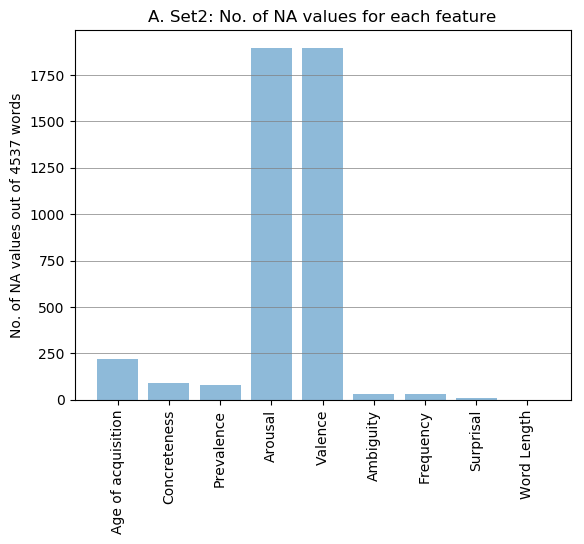

220 92 79 1897 1897 31 31 10 0


In [481]:
# Bar plot code 

objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal','Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. of NA values out of 4537 words')
plt.title('A. Set2: No. of NA values for each feature')
plt.savefig('A_set2.png',bbox_inches = 'tight')

plt.show()

print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

### b. Unique no. of NAs
#### No digits

### Unique no of NAs function

In [313]:
def uniqueNA(tuplelst):
    NAlst = []
    for tup in tuplelst:
        if tup[1] == ['#NA']:
            NAlst.append(tup[0])
    
    uniqueWords = np.unique(NAlst)
    
    return uniqueWords
            

In [327]:
#uniqueNA(prevTup_lem)

#### Zip merged lists and wordlst

In [374]:
#print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

aoaMergeT = list(zip(wordlst_l,aoaMerge)) #aoaMerge TUPLE
concMergeT = list(zip(wordlst_l,concMerge)) 
prevMergeT = list(zip(wordlst_l,prevMerge)) 
arMergeT = list(zip(wordlst_l,arMerge)) 
valMergeT = list(zip(wordlst_l,valMerge)) 
ambMergeT = list(zip(wordlst_l,ambMerge)) 
freqMergeT = list(zip(wordlst_l,freqMerge)) 


In [375]:
aoaU = uniqueNA(aoaMergeT)
concU = uniqueNA(concMergeT)
prevU = uniqueNA(prevMergeT)
arU = uniqueNA(arMergeT)
valU = uniqueNA(valMergeT)
ambU = uniqueNA(ambMergeT)
freqU = uniqueNA(freqMergeT)
surpU = u_sur
lenU = 0

aoaUlst = aoaU.tolist()
concUlst = concU.tolist()
prevUlst = prevU.tolist()
arUlst = arU.tolist()
valUlst = valU.tolist()
ambUlst = ambU.tolist()
freqUlst = freqU.tolist()
surpUlst = surpU.tolist()

In [344]:
# print(aoaU,concU,prevU,arU,valU,ambU,freqU,surpU,lenU

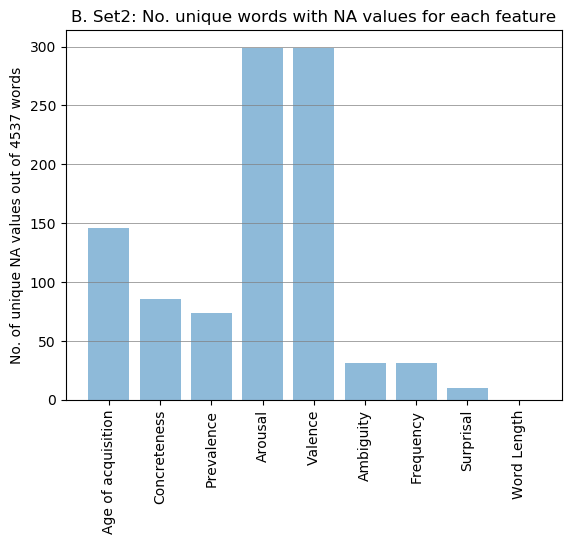

146 86 74 299 299 31 31 10 0


In [482]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal', 'Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [len(aoaU),len(concU),len(prevU),len(arU),len(valU),len(ambU),len(freqU),len(surpU),lenU]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. of unique NA values out of 4537 words')
plt.title('B. Set2: No. unique words with NA values for each feature')
plt.savefig('B_set2.png',bbox_inches = 'tight')

plt.show()
print(len(aoaU),len(concU),len(prevU),len(arU),len(valU),len(ambU),len(freqU),len(surpU),lenU)


### Finding unique NAs for all features! 

In [377]:
big_u_lst=aoaUlst+concUlst+prevUlst+arUlst+valUlst+ambUlst+freqUlst+surpUlst

In [378]:
u_lst=list(set(big_u_lst))

In [379]:
u_lst=sorted(u_lst)

In [380]:
print(len(big_u_lst))
print(len(u_lst))

# No. of unique NAs is 303

976
303


In [382]:
# Write u_lst to excel file

wb = xl.Workbook('set2_unique_NA.xlsx')
sheet1 = wb.add_worksheet('sheet1')

sheet1.write('A1','Word')
add_counter = 0
for word in u_lst:
    add_counter += 1
    sheet1.write(add_counter,0,word)


### c. average proportion of words with NAs per sentence (mean across sentences with SEM = standard error of the mean over sentences)


In [385]:
# number of words for each sentence

# f1g contains the sentences
print(f1g[0:2])

w_count = 0
w_lst=[] #Number of words within each sentence
for sentence in f1g:
    for word in sentence:
        w_count +=1 
        
    w_lst.append(w_count)

    w_count=0

# print(w_lst)

[['An', 'accordion', 'is', 'a', 'portable', 'musical', 'instrument', 'with', 'two', 'keyboards.'], ['One', 'keyboard', 'is', 'used', 'for', 'individual', 'notes,', 'the', 'other', 'for', 'chords.']]


###  Function for avg. proportion of words with NAs per sentences

In [405]:
def avgNA(tuplelst):
    count = 0
    avgNA = []
    for tup in tuplelst:
        if tup[1].count('#NA') == 1 or tup[1].count('[#NA]') == 1:
            count += 1
            
        for char in tup[0]:
            if char != '.':
                continue
            if char == '.':
                avgNA.append(count)
                count = 0
                
    divLst = np.divide(avgNA,w_lst)
    meanLst = np.mean(divLst)
    return meanLst, divLst


In [397]:
#print(aoaNA,concNA,prevNA,arNA,valNA,ambNA,freqNA,surpNA,lenNA)

aoaMergeT2 = list(zip(wordlst,aoaMerge)) #aoaMerge TUPLE
concMergeT2 = list(zip(wordlst,concMerge)) 
prevMergeT2 = list(zip(wordlst,prevMerge)) 
arMergeT2 = list(zip(wordlst,arMerge)) 
valMergeT2 = list(zip(wordlst,valMerge)) 
ambMergeT2 = list(zip(wordlst,ambMerge)) 
freqMergeT2 = list(zip(wordlst,freqMerge)) 
surpMergeT2 = list(zip(wordlst,surpVals))

In [396]:
print(freqMergeT2[0:10])

[('An', [4.97805263012357]), ('accordion', [1.83250891270624]), ('is', [5.662440491974]), ('a', [6.01752581716572]), ('portable', [2.31175386105575]), ('musical', [2.82736927305383]), ('instrument', [2.6170003411209]), ('with', [5.41071988585366]), ('two', [4.73547913286875]), ('keyboards.', [1.36172783601759])]


In [406]:
aoaAvgNA, aoaDiv = avgNA(aoaMergeT2)
concAvgNA, concDiv = avgNA(concMergeT2)
prevAvgNA, prevDiv = avgNA(prevMergeT2)
arAvgNA, arDiv = avgNA(arMergeT2)
valAvgNA, valDiv = avgNA(valMergeT2)
ambAvgNA, ambDiv = avgNA(ambMergeT2)
freqAvgNA, freqDiv = avgNA(freqMergeT2)
surpAvgNA, surpDiv = avgNA(surpMergeT2)
lenAvgNA = 0


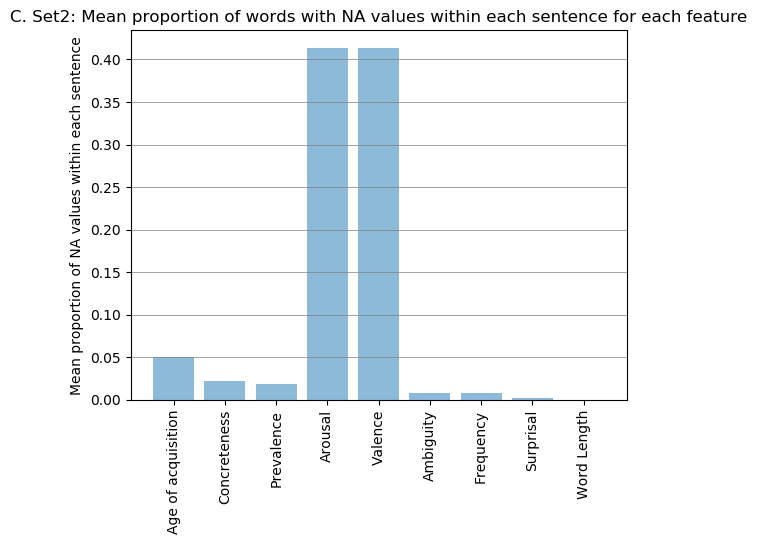

0.04983914080880993 0.021692872376466128 0.01866801817973693 0.41371917643383876 0.41371917643383876 0.007449036062317313 0.007449036062317313 0.00261039596977097 0


In [483]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal', 'Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaAvgNA,concAvgNA,prevAvgNA,arAvgNA,valAvgNA,ambAvgNA,freqAvgNA,surpAvgNA,lenAvgNA]

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Mean proportion of NA values within each sentence')
plt.title('C. Set2: Mean proportion of words with NA values within each sentence for each feature')
plt.savefig('C_set2.png',bbox_inches = 'tight')

plt.show()

print(aoaAvgNA,concAvgNA,prevAvgNA,arAvgNA,valAvgNA,ambAvgNA,freqAvgNA,surpAvgNA,lenAvgNA)

### e. Proportion of sentences where c. is 0.50 or higher 

In [408]:
print(len(aoaDiv))

384


### Function for computing no of sentences where c. is >= 0.5

In [419]:
def findProp(divlst):
    propLst = []
    for val in divlst:
        if val >= 0.5:
            propLst.append(val)
    
    return len(propLst)

In [421]:
aoaProp = findProp(aoaDiv)
concProp = findProp(concDiv)
prevProp = findProp(prevDiv)
arProp = findProp(arDiv)
valProp = findProp(valDiv)
ambProp = findProp(ambDiv)
freqProp = findProp(freqDiv)
surpProp = findProp(surpDiv)
lenProp = 0


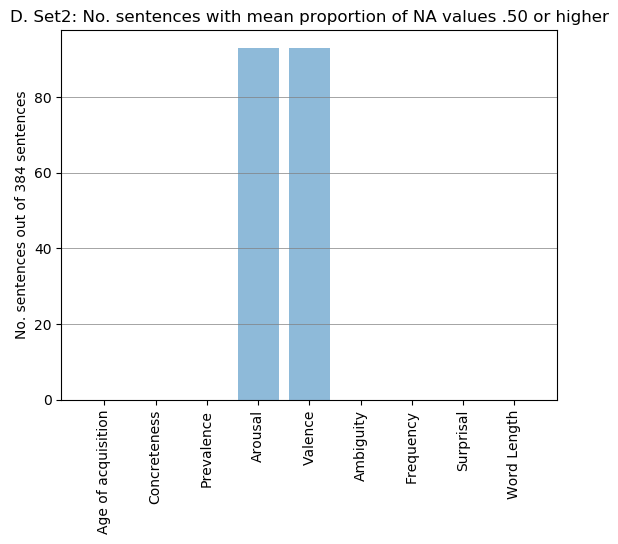

0 0 0 93 93 0 0 0 0


In [484]:
objects = ('Age of acquisition', 'Concreteness', 'Prevalence', 'Arousal', 'Valence','Ambiguity','Frequency','Surprisal','Word Length') #'Ambiguity', 'Log lexical freq', 'Lexical surprisal')
y_pos = np.arange(len(objects))
counts = [aoaProp,concProp,prevProp,arProp,valProp,ambProp,freqProp,surpProp,lenProp] 

plt.grid(color='grey', which='both',linestyle='-', axis='y',linewidth=0.5)
plt.bar(y_pos, counts, align='center',alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('No. sentences out of 384 sentences')
plt.title('D. Set2: No. sentences with mean proportion of NA values .50 or higher')
plt.savefig('D_set2.png',bbox_inches = 'tight')

plt.show()
print(aoaProp,concProp,prevProp,arProp,valProp,ambProp,freqProp,surpProp,lenProp)


### Averaging sentences

In [ ]:
# Approach. For each sentence (.), 
# I need a 9 dimensional vector for each sentence. 

# For e.g. first sentence, AoA. 7 words. 6 vals. Take out the word with a NA value. Use the rest for computing avg. 

# Read in excel row as a tuple. If tup[1] to tup[6] are NAs, remove that word. Add tuples collected together in sentences. 

In [86]:
# wordvals_sur=[]

# for i in surplist:
#     if i == ['#NA']
    
#     wordvals_sur.append([float(i)])
    
# print(wordvals_sur)

In [427]:
print(len(wordlen)) #wordlen is the list to use for averaging word lengths within sentence 

4537


In [429]:
surpMerge = surpVals

In [430]:
# Creating a tuple of all the values I want to find averages for 

test_tup = list(zip(aoaMerge,concMerge,prevMerge,arMerge,valMerge,ambMerge,freqMerge,surpMerge,wordlen))

In [431]:
print(test_tup[0:5])

[(['#NA'], [1.46], [2.0553081956134243], ['#NA'], ['#NA'], [0.9983158249300015], [4.97805263012357], '8.617', 2), ([8.61], [4.86], [1.893490405711035], [2.94], [5.26], [1.0], [1.83250891270624], '18.898', 9), ([5.11], [1.59], [1.9838677206195896], [3.43], [6.18], [0.998478085451927], [5.662440491974], '6.985', 2), ([2.8933839999999993], [1.46], [1.9172555067699781], ['#NA'], ['#NA'], [0.9606577509597439], [6.01752581716572], '6.037', 1), ([7.95], [2.62], [2.5758293035489], [3.38], [5.91], [0.9607843137254902], [2.31175386105575], '14.089', 8)]


In [436]:
print(surpMerge)

['8.617', '18.898', '6.985', '6.037', '14.089', '13.660', '14.863', '7.549', '10.399', '16.232', '9.229', '14.801', '6.985', '10.466', '6.651', '12.618', '12.864', '4.687', '9.251', '6.651', '17.061', '22.222', '14.040', '12.541', '7.549', '19.526', '7.454', '14.215', '11.856', '10.766', '19.154', '8.617', '23.768', '14.742', '11.348', '16.232', '11.364', '14.034', '5.519', '15.043', '4.687', '19.526', '8.617', '14.242', '6.985', '6.037', '25.441', '8.867', '7.454', '6.985', '10.943', '5.502', '6.037', '12.182', '8.617', '14.242', '9.492', '8.574', '9.229', '7.846', '8.592', '13.153', '8.051', '10.685', '8.051', '6.037', '13.255', '5.519', '6.037', '14.996', '10.085', '13.916', '7.960', '6.651', '12.111', '10.277', '12.386', '6.651', '13.623', '4.687', '12.182', '8.906', '8.574', '6.037', '15.106', '6.037', '15.996', '13.724', '7.846', '13.293', '12.840', '12.260', '8.617', '13.525', '6.985', '6.037', '14.676', '7.454', '8.906', '7.957', '12.426', '12.048', '7.846', '12.827', '17.174',

In [437]:
# This version uses wordlst as the key, BUT the values correspond to the lemmatized list. Wordlst_lem DOES NOT have '.', i.e. it's harder to use.

d = {} # Overall dictionary 
sentence_num = 1
cnt = 0
d[1] = {} #The first sentence dictionary, which contains all the words for sentence 1

while cnt < len(wordlst):
    
    if wordlst[cnt][-1] == '.': # Checking the last char of each word
        d[sentence_num][wordlst[cnt]] = [] # Creating a new empty dict for the given word.
        flag = False
        for feat in test_tup[cnt]: # Iterating through each feature in the tuple list for the respective count
            if feat == ['#NA'] or feat == '[#NA]':
                flag = True
                break
            else:
                
                d[sentence_num][wordlst[cnt]].append(feat) # appending each feature if it is NOT a #NA
        if flag: 
            del d[sentence_num][wordlst[cnt]]
        sentence_num += 1
        d[sentence_num] = {} # When every feature is appended for reach word, a new dict is created for the next sentence
        cnt += 1
    else:
        d[sentence_num][wordlst[cnt]] = [] #If the character is not . appending the feature for the respective word
        #d[sentence_num][wordlst[cnt]].append(i)
        flag = False
        for feat in test_tup[cnt]:
            if feat == ['#NA'] or feat == '[#NA]':
                flag = True
                break
            else:
                d[sentence_num][wordlst[cnt]].append(feat)
        if flag:
            del d[sentence_num][wordlst[cnt]]
        cnt += 1    

In [438]:
for key in d.keys():
    for value in d[key]:
        print(key,value)

1 accordion
1 is
1 portable
1 musical
1 instrument
1 two
1 keyboards.
2 One
2 keyboard
2 is
2 used
2 individual
2 other
2 chords.
3 Accordions
3 produce
3 sound
3 bellows
3 blow
3 air
4 plays
4 keyboards
4 opening
4 closing
4 bellows.
5 apartment
5 is
5 home
5 part
5 building.
6 apartment
6 may
6 have
6 one
6 rooms,
6 kitchen
6 bathroom.
7 apartments
7 are
7 single
7 people,
7 families.
8 building
8 can
8 have
8 garage,
8 laundry
8 facility
8 extra
8 storage
8 space.
9 apple
9 is
9 fruit
9 can
9 be
9 green,
9 red
9 yellow.
10 Apples
10 have
10 thin
10 skin,
10 crisp,
10 sweet
10 pulp
10 seeds
11 tart
11 apples
11 are
11 used
11 make
11 cider.
12 Apples
12 can
12 be
12 eaten
12 raw,
12 roasted
12 baked
12 pies.
13 Arson
13 is
13 criminal
13 act
13 burning
13 building
14 fire
14 investigation
14 determines
14 was
14 caused
14 accident
14 arson.
15 Arson
15 can
15 be
15 done
15 cause
15 damage
15 collect
15 insurance.
16 severity
16 crime
16 depends
16 people
16 were
17 automobile,
17 car

140 electrical
140 wiring
141 foot
141 is
141 body
141 part
141 end
141 leg.
142 People
142 use
142 feet
142 running
142 standing
143 People
143 use
143 feet
143 kick,
143 sports.
144 cultures
144 have
144 rules
144 behavior
144 related
145 forest
145 is
145 area
145 high
145 density
145 trees
145 canopy
145 cover.
146 type
146 forest
146 temperature
146 location.
147 forest
147 ecosystem
147 has
147 various
147 types
147 trees
147 animals,
147 ground
147 plants.
148 is
148 cutting
148 forests
148 disregarding
148 regeneration.
149 fork
149 is
149 tool
149 eating
149 solid
149 foods,
149 handle
150 Forks
150 are
150 made
150 metal,
150 plastic,
150 disposable.
151 Forks
151 are
151 used
151 lift
151 food
151 mouth
151 hold
151 place
152 Forks
152 are
152 used
152 Western
152 cultures,
152 special
152 kinds
152 various
152 foods.
153 pan
153 is
153 small
153 sloping
153 sides
153 handle.
154 pan
154 is
154 used
154 fry,
154 brown
154 food.
155 food
155 is
155 cooked
155 oil
155 covering

359 holds
359 instrument
359 chin
359 collarbone.
360 Different
360 notes
360 are
360 made
360 fingering
360 neck
360 one
360 hand
361 Vultures
361 are
361 feeding
361 carcasses
361 dead
361 animals.
362 vultures
362 have
362 bald
362 head
362 feathers
362 losing
362 heat.
363 Vultures
363 use
363 large
363 wings
363 soar
363 miles
364 Vultures
364 attack
364 healthy
364 animals,
364 may
364 kill
364 sick.
365 wall
365 is
365 solid
365 structure
365 defines
365 protects
365 area.
366 Walls
366 building,
366 support
366 roof,
366 divide
366 space
366 rooms.
367 Walls
367 are
367 made
367 stone,
367 brick,
367 cement,
368 Retaining
368 walls
368 provide
368 barrier
368 movement
368 earth,
368 stone
368 water.
369 Water
369 is
369 common
369 liquid
369 Earth,
369 covering
369 area.
370 Plants,
370 animals
370 people
370 must
370 drink
370 water
370 order
370 live.
371 Water
371 freezes
371 low
371 temperature
371 becomes
371 solid
371 ice.
372 Rain
372 is
372 water
372 falls
372 clouds
37

In [441]:

feat_names=['aoa','conc','prev','ar','val','amb','freq','surp','len']

sentence_lengths = ['Sentence Lengths:']
avg_feat_val =  {}
for sent in d:
    if sent == 385: # Only 384/243 sentences! 
        break
    avg_feat_val[sent] = {}
    for feat_name in feat_names:
        if feat_name not in avg_feat_val[sent]:
            avg_feat_val[sent][feat_name] = 0
    for word in d[sent]:    

        word_feats = d[sent][word]
        i = 0
        #print(word_feats)
        #print(len(d[sent]))
        for feat_name in feat_names:
            try:
                avg_feat_val[sent][feat_name] += word_feats[i][0] / len(d[sent])
            except TypeError:
                avg_feat_val[sent][feat_name] += float(word_feats[i]) / len(d[sent])
            i += 1
        


In [442]:
avg_feat_val

{1: {'aoa': 7.064216428571429,
  'conc': 3.7385714285714284,
  'prev': 2.2841762924377758,
  'ar': 3.7399999999999998,
  'val': 6.168571428571429,
  'amb': 0.9856315282557697,
  'freq': 3.0497542641138655,
  'surp': 13.589428571428572,
  'len': 6.857142857142858},
 2: {'aoa': 6.4138714285714284,
  'conc': 3.282857142857143,
  'prev': 2.3112016739820267,
  'ar': 3.3642857142857143,
  'val': 5.707142857142857,
  'amb': 0.8089596546765176,
  'freq': 3.7589210222574643,
  'surp': 11.487285714285713,
  'len': 5.428571428571429},
 3: {'aoa': 6.868565833333333,
  'conc': 3.856666666666667,
  'prev': 2.2404039624314462,
  'ar': 3.798333333333333,
  'val': 5.953333333333333,
  'amb': 0.7845996304609462,
  'freq': 2.7315313019443153,
  'surp': 15.733333333333334,
  'len': 6.000000000000001},
 4: {'aoa': 7.478279000000001,
  'conc': 3.716,
  'prev': 2.3486921312634044,
  'ar': 4.112,
  'val': 5.706,
  'amb': 0.6731717574111065,
  'freq': 2.51700504041967,
  'surp': 15.915399999999998,
  'len': 7.

In [453]:
avg_feat_val2 = avg_feat_val.items()

print(len(avg_feat_val2))

384


In [467]:
# Prepping the MATLAB structure 

vlst = []

for k,v in avg_feat_val2:
    vlst.append(v.items())
    
#print(vlst)
    
flatAvg = []
for entry in vlst:
    for ele in entry:
        for i in ele:
            flatAvg.append(i)

print(len(flatAvg))
print(len(vlst))

# For set 3:
9*384*2

6912
384


6912

In [468]:
# For set3
newnum = flatAvg[1::2]
#print(newnum)

In [462]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [463]:
splitlst = split_list(newnum,384)

In [469]:
print(splitlst) #Contains 384x9 vals or 243x9 vals

[[7.064216428571429, 3.7385714285714284, 2.2841762924377758, 3.7399999999999998, 6.168571428571429, 0.9856315282557697, 3.0497542641138655, 13.589428571428572, 6.857142857142858], [6.4138714285714284, 3.282857142857143, 2.3112016739820267, 3.3642857142857143, 5.707142857142857, 0.8089596546765176, 3.7589210222574643, 11.487285714285713, 5.428571428571429], [6.868565833333333, 3.856666666666667, 2.2404039624314462, 3.798333333333333, 5.953333333333333, 0.7845996304609462, 2.7315313019443153, 15.733333333333334, 6.000000000000001], [7.478279000000001, 3.716, 2.3486921312634044, 4.112, 5.706, 0.6731717574111065, 2.51700504041967, 15.915399999999998, 7.0], [5.609304, 3.706, 2.336792115106629, 3.5439999999999996, 5.9239999999999995, 0.9082476529237462, 4.343354899532536, 10.643799999999999, 5.4], [4.4553, 4.015714285714286, 2.4626822814955784, 3.291428571428571, 5.757142857142858, 0.9250076694869327, 4.118525145056412, 11.848714285714285, 5.571428571428571], [5.05, 3.798, 2.404354451612338,

In [470]:
sio.savemat('set2_lex_features.mat', mdict={'my_list': splitlst})